## Time Series Prediction using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temprature values to "Temprature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temprature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

#### Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Change your present working directory

In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Notebooks/Res-9')

### Load your data file

In [0]:
import pandas as pd


In [193]:
data = pd.read_csv('daily-minimum-temperatures-in-me.csv',header=0, index_col=0,parse_dates=True)
data.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


#### Plot data

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

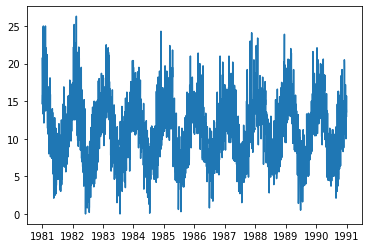

In [195]:
plt.plot(data);

#### Descibe your dataframe

In [196]:
data.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


#### Check for null values

In [197]:
data.isnull().any()

Temperature    False
dtype: bool

#### Drop null values

In [198]:
data.isna().any()

Temperature    False
dtype: bool

#### Get the representation of the distribution of data in the form of histogram

(array([ 53., 181., 564., 862., 830., 670., 347., 102.,  32.,   9.]),
 array([ 0.  ,  2.63,  5.26,  7.89, 10.52, 13.15, 15.78, 18.41, 21.04,
        23.67, 26.3 ]),
 <a list of 10 Patch objects>)

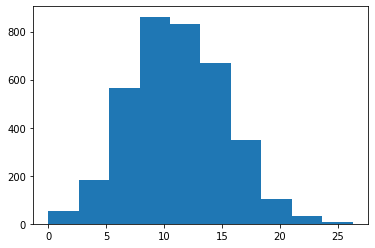

In [199]:
plt.hist(data['Temperature'])


#### Check the maximum and minimum values

In [200]:
data.Temperature.min()

0.0

In [201]:
data.Temperature.max()

26.3

### Normalize the data

In [0]:
from scipy.stats import zscore

In [0]:
data = data.apply(zscore)

In [204]:
data.head()

,Temperature
Date,
1981-01-01,2.338883
1981-01-02,1.651139
1981-01-03,1.872199
1981-01-04,0.840583
1981-01-05,1.135330


#### Check the maximum and minimum values of scaled data

In [205]:
data.Temperature.min()

-2.7455139325727043

In [206]:
data.Temperature.max()

3.7143723865669944

#### Look into some of the scaled values

In [207]:
data[10:20]

,Temperature
Date,
1981-01-11,1.233580
1981-01-12,0.521273
1981-01-13,1.356391
1981-01-14,2.535382
1981-01-15,3.395062
1981-01-16,2.338883
1981-01-17,2.314321
1981-01-18,3.345938
1981-01-19,1.602014


### Split data into Training and Testing

In [208]:
#70% examples will used for training
train_size = int(len(data) * 0.70)

#30% will be used for Test
test_size = len(data - train_size)
print("Train data")

print(train.head())

print("Test data")
test.head()


Train data
            Temperature  t+1 temparature
Date                                    
1981-01-01     2.338883         1.651139
1981-01-02     1.651139         1.872199
1981-01-03     1.872199         0.840583
1981-01-04     0.840583         1.135330
1981-01-05     1.135330         1.135330
Test data


,Temperature,t+1 temparature
Date,,
1988-01-01,1.012519,0.766896
1988-01-02,0.766896,0.570397
1988-01-03,0.570397,0.938832
1988-01-04,0.938832,0.594960
1988-01-05,0.594960,0.987956


#### Print train and test size

In [209]:
#Split the data
X_train, X_test = data[0:train_size], data[train_size: len(data)]
print('train: {}\ntest: {}'.format(len(X_train), len(X_test)))

train: 2555
test: 1095


## Create the sequential data
Map the temprature at a particular time t to the temprature at time t+n, where n is any number you define.

For example: to map tempratures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [0]:
#function is not required for this , we can use SHIFT function in dataframe

#### Use function to get training and test set

In [211]:
y_train = X_train['Temperature'].shift(periods=-1)
y_train

Date
1981-01-01    1.651139
1981-01-02    1.872199
1981-01-03    0.840583
1981-01-04    1.135330
1981-01-05    1.135330
                ...   
1987-12-27    0.742333
1987-12-28    0.766896
1987-12-29    0.521273
1987-12-30    1.356391
1987-12-31         NaN
Name: Temperature, Length: 2555, dtype: float64

In [0]:
#removing the last row
X_train = X_train[:-1]
y_train = y_train[:-1]

In [213]:
y_test = X_test['Temperature'].shift(periods=-1)
y_test

Date
1988-01-01    0.766896
1988-01-02    0.570397
1988-01-03    0.938832
1988-01-04    0.594960
1988-01-05    0.987956
                ...   
1990-12-27    0.594960
1990-12-28    0.570397
1990-12-29    1.110768
1990-12-30    0.447586
1990-12-31         NaN
Name: Temperature, Length: 1095, dtype: float64

In [0]:
#removing the last row
X_test = X_test[:-1]
y_test = y_test[:-1]

#### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [215]:
print("Before reshape")
print(X_train.shape)
print(X_test.shape)
#Make it 3 Dimensional Data - needed for LSTM
X_train = np.reshape(np.array(X_train), (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(np.array(X_test), (X_test.shape[0], X_test.shape[1], 1))
print("After reshape")
print(X_train.shape)
print(X_test.shape)

Before reshape
(2554, 1)
(1094, 1)
After reshape
(2554, 1, 1)
(1094, 1, 1)


In [216]:
X_train

array([[[2.33888328]],

       [[1.65113873]],

       [[1.87219948]],

       ...,

       [[0.74233343]],

       [[0.76689574]],

       [[0.52127269]]])

## Define Model

### Define sequntial model, add LSTM layer and compile the model

In [0]:
from keras.models import Sequential

In [0]:
keras.backend.clear_session()
model = Sequential()


In [0]:
from keras.layers import LSTM,Dense

In [0]:
model.add(LSTM(32,input_shape = X_train.shape[1:] ))

In [0]:
model.add(Dense(1))

### Summarize your model

In [222]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [0]:
model.compile(optimizer='adam',loss='mse')

In [239]:
model.fit(X_train,y_train,batch_size=32,epochs=300,validation_data=(X_test,y_test))

Train on 2554 samples, validate on 1094 samples
Epoch 1/300
2554/2554 [==============================] - 0s 108us/step - loss: 0.4126 - val_loss: 0.3603
Epoch 2/300
2554/2554 [==============================] - 0s 111us/step - loss: 0.4131 - val_loss: 0.3618
Epoch 3/300
2554/2554 [==============================] - 0s 113us/step - loss: 0.4127 - val_loss: 0.3615
Epoch 4/300
2554/2554 [==============================] - 0s 107us/step - loss: 0.4127 - val_loss: 0.3600
Epoch 5/300
2554/2554 [==============================] - 0s 99us/step - loss: 0.4129 - val_loss: 0.3602
Epoch 6/300
2554/2554 [==============================] - 0s 108us/step - loss: 0.4129 - val_loss: 0.3621
Epoch 7/300
2554/2554 [==============================] - 0s 111us/step - loss: 0.4128 - val_loss: 0.3615
Epoch 8/300
2554/2554 [==============================] - 0s 99us/step - loss: 0.4130 - val_loss: 0.3609
Epoch 9/300
2554/2554 [==============================] - 0s 103us/step - loss: 0.4126 - val_loss: 0.3604
Epoch 10/

## Make Predictions and Evaluate your model

In [0]:
#Get prediction for both Training and Test Data
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [226]:
trainPredict[0]

array([1.6493989], dtype=float32)

## Plot the results

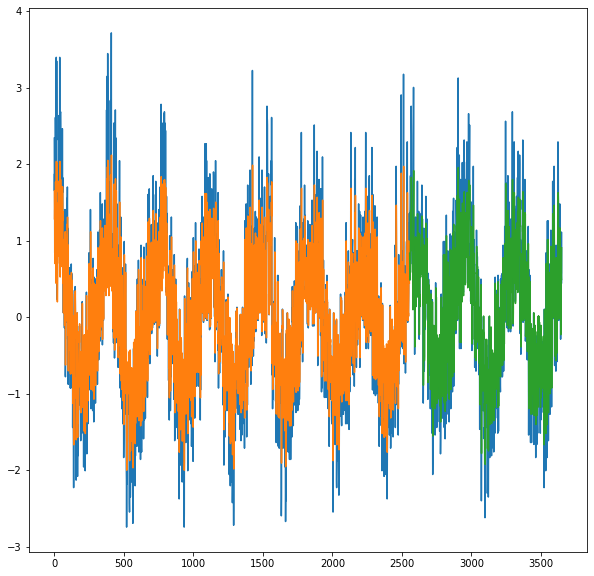

In [240]:
window_size = 1
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window_size:len(trainPredict)+window_size, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(window_size*2):len(data), :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(10,10))
plt.plot(np.array(data))

plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()